# **Question 1: Import the spam dataset and print the first six rows.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [6]:

# Path to the 'spambase.names.txt' file in Colab environment
names_file_path = 'spambase.names.txt'

# Initialize a list to store the column names
column_names = []

# Open and parse the names file to extract column names
with open(names_file_path, 'r') as file:
    for line in file:
        # Exclude comments and empty lines
        if not line.startswith('|') and line.strip():
            # The column name is the first word before the colon
            column_name = line.split(':')[0]
            column_names.append(column_name)

# The dataset URL
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

# Load the dataset with the appropriate column names
df = pd.read_csv(data_url, names=column_names)

# Display the first six rows of the dataset
print(df.head(6))


   1, 0.    | spam, non-spam classes\n  word_freq_make  word_freq_address  \
0                                 0.00            0.64               0.64   
1                                 0.21            0.28               0.50   
2                                 0.06            0.00               0.71   
3                                 0.00            0.00               0.00   
4                                 0.00            0.00               0.00   
5                                 0.00            0.00               0.00   

   word_freq_all  word_freq_3d  word_freq_our  word_freq_over  \
0            0.0          0.32           0.00            0.00   
1            0.0          0.14           0.28            0.21   
2            0.0          1.23           0.19            0.19   
3            0.0          0.63           0.00            0.31   
4            0.0          0.63           0.00            0.31   
5            0.0          1.85           0.00            0.00   

   w

# **Question 3: The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?**

dependent variable: "spam":
*   1 = spam
*   0 = not spam

3 independent variables in dataset i think will be important predictors in a model of spam:

1. **capital_run_length_average (average length of uninterrupted sequences of capital letters):**
usually spam emails have a lot of capital letters in order to grab

2. **word_freq_mail**
the frequency of the word "mail" could be higher in spam emails as they may more frequently refer to email activities or try to legitimize themselves by sounding more email-related. "check your mail"/"receive your mail"

3. **char_freq_!**
i'm assuming that this is the frequency of '!'  Spam emails often contain lots of exclamation mark due to marketing and promotional content to create urgency or excitement

# **Question 4: Visualize the univariate distribution of each of the variables in the previous question.**

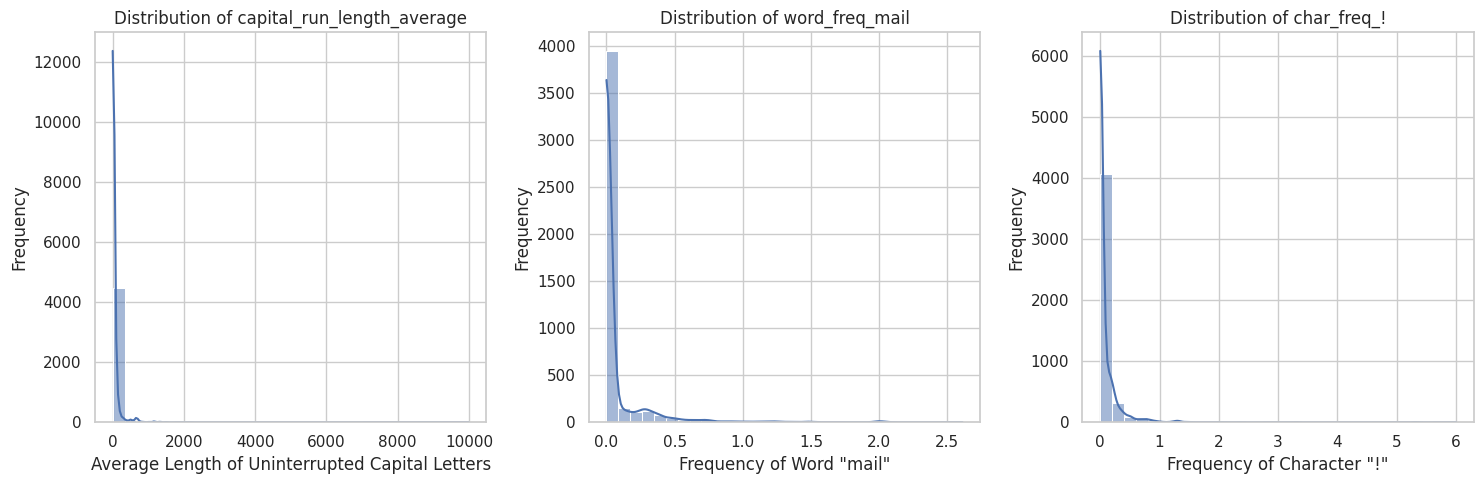

In [10]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
plt.figure(figsize=(15, 5))

# Plotting capital_run_length_average
plt.subplot(1, 3, 1)  # 1 row, 3 cols, subplot 1
sns.histplot(df['capital_run_length_average'], bins=30, kde=True)
plt.title('Distribution of capital_run_length_average')
plt.xlabel('Average Length of Uninterrupted Capital Letters')
plt.ylabel('Frequency')

# Plotting word_freq_mail
plt.subplot(1, 3, 2)  # 1 row, 3 cols, subplot 2
sns.histplot(df['word_freq_mail'], bins=30, kde=True)
plt.title('Distribution of word_freq_mail')
plt.xlabel('Frequency of Word "mail"')
plt.ylabel('Frequency')

# Plotting char_freq_!
plt.subplot(1, 3, 3)  # 1 row, 3 cols, subplot 3
sns.histplot(df['char_freq_!'], bins=30, kde=True)
plt.title('Distribution of char_freq_!')
plt.xlabel('Frequency of Character "!"')
plt.ylabel('Frequency')

# Adjusting layout for better readability and displaying the plots
plt.tight_layout()
plt.show()


# **Question 5: Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".**

1. Linear Regression
2. Logistic Regression
3. Support Vector Machines
4. Decision Trees
5. KNN

# **Question 6: Describe the importance of training and testing data**

1. **Model Evaluation**: To evaluate the performance of a model on unseen data. While training data is used to fit model, test data is for new data
2. **Overfitting Prevention**: Using separate test data can ensure that the model's performance assessment reflects its ability to generalize unseen data, and not just memorize the training set
3. **Model Tuning and Selection**: Training and test enables comparison among different models and hyperparameters.

# **Question 7: What is k-fold cross validation and what do we use it for?**

cross-validation is a technique to assess the generalizability of a ML model, ensuring the evaluation isn't just a result of lucky data splitting. In k-fold cross validation, data is divided into k subsets. The model is trained and evaluated k times, using each subset once as a test set and the remaining as a training set. This approach, particularly useful when data is scarce, offers a robust estimate of the model's performance on unseen data by averaging the results from all k iterations.
this method reduces bias compared to a single train/test split, ensuring the performance reflects the model's ability of one data split. The method evaluates the model's design across different subsets, not just one training instance.

# **Question 8: How is k-fold cross validation different from stratified k-fold cross validation?**

K-fold cross-validation and stratified k-fold cross-validation are both resampling techniques used to evaluate machine learning models, but they handle the distribution of data differently:

**K-fold Cross-validation:** This method divides the dataset into k equally (or nearly equally) sized folds or subsets. In each of k iterations, a different fold is used as the validation set, and the remaining k-1 folds are used for training. However, the key point is that this method splits the data randomly without considering the output labels. This randomness can sometimes lead to uneven representation of different classes in each fold, especially in cases where the dataset is imbalanced.

**Stratified K-fold Cross-validation:** This method also divides the data into k folds but does so in a way that maintains the same percentage of samples for each class as in the whole dataset in each fold. In other words, it stratifies the data before splitting into folds, ensuring that each fold is a good representative of the whole, especially in terms of the class distribution. This approach is particularly important for datasets with an imbalanced class distribution, as it ensures that each fold has a class distribution that mirrors that of the original dataset.

In summary, while both methods aim to provide reliable evaluation metrics, stratified k-fold cross-validation is preferred when dealing with imbalanced datasets as it ensures each fold is an accurate reflection of the overall dataset's class distribution, leading to more reliable and robust evaluation metrics.

# **Question 9: Choose one model from question five.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.**

I'm going to choose the Logistic Regresion model for this task because it is commonly used for binary classification problems like predicting if an email is a spam or not.
The three variables we will use as predictors based on the previous discussion are:

1. capital_run_length_average - average length of uninterrupted sequences of capital letters.
2. word_freq_mail - frequency of the word "mail".
3. char_freq_! - frequency of the exclamation mark.

In [14]:
print(df.columns)


Index(['1, 0.    | spam, non-spam classes\n', 'word_freq_make',
       'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
       'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive',
       'word_freq_will', 'word_freq_people', 'word_freq_report',
       'word_freq_addresses', 'word_freq_free', 'word_freq_business',
       'word_freq_email', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
       'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
       'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu

In [8]:
#                     DATA PREPERATION
# Set 'y' to the last column of the DataFrame
y = df.iloc[:, -1]  # This selects the last column

# Dataset splitting and model as before
X = df[['word_freq_mail', 'capital_run_length_average', 'char_freq_!']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
#                   BUILDING THE LOGISTIC REGRESSION MODEL
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

#                Question 9A: EVALUATE PREDICTION ERROR ON TEST DATA

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



#                Question 9B: EVALUATE USING K-FOLD CROSS VALIDATION

# Specify the model and number of folds
k = 10  # You can choose k based on your dataset size and computation limitations
model = LogisticRegression()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Calculate and print the average accuracy
print(f"Average Accuracy: {scores.mean()}")


              precision    recall  f1-score   support

           0       0.75      0.96      0.84       531
           1       0.91      0.57      0.70       390

    accuracy                           0.79       921
   macro avg       0.83      0.77      0.77       921
weighted avg       0.82      0.79      0.78       921

Confusion Matrix:
 [[509  22]
 [167 223]]
Average Accuracy: 0.8017919456757522


# **Question 10: Choose a second model from question five.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?**
For my second model, I will choose KNN. KNN is also commonly used for classification problems, including binary, ie. predicting whether an email is a spam. The three variables we will continue to use as predictors are:

1. capital_run_length_average
2. word_freq_mail
3. char_freq_!

KNN is useful especially in cases where the relationship between features is not expected to be linear.
The choice of k (the number of nearest neighbors) is crucial in KNN. Too small a value for k can lead to overfitting, where the model captures noise in the training data. Too large a value can lead to underfitting, where the model is too generalized. A common approach to choosing k is to try a range of values and select the one that performs best on validation data. For this example, without specific validation data, I  start with k=5, a common default choice, but ideally, I'd use cross-validation to choose k.


In [10]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report on Test Data:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_pred_knn))

# Evaluate using k-fold cross-validation
from sklearn.model_selection import cross_val_score
k_fold = 10  # Number of folds
knn_scores = cross_val_score(knn_model, X, y, cv=k_fold, scoring='accuracy')
print(f"KNN Average Accuracy using {k_fold}-Fold Cross-Validation: {knn_scores.mean()}")


KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       531
           1       0.74      0.69      0.71       390

    accuracy                           0.77       921
   macro avg       0.76      0.76      0.76       921
weighted avg       0.76      0.77      0.76       921

KNN Confusion Matrix on Test Data:
 [[435  96]
 [120 270]]
KNN Average Accuracy using 10-Fold Cross-Validation: 0.490551730642271


Comparison between the Logistic Regression model and the KNN model:

1. **Accuracy on Test Data**:
   - Logistic Regression: 0.79
   - KNN: 0.77

   The Logistic Regression model has a slightly higher accuracy on the test data compared to the KNN model.

2. **Precision, Recall, and F1-Score on Test Data** (for the spam class '1'):
   - Logistic Regression: Precision = 0.91, Recall = 0.57, F1-Score = 0.70
   - KNN: Precision = 0.74, Recall = 0.69, F1-Score = 0.71

   While KNN has a slightly better recall and F1-score for the spam class, Logistic Regression significantly outperforms KNN in precision.

3. **Confusion Matrix Analysis**:
   - Logistic Regression resulted in fewer false negatives (167 vs. 120) but more false positives (22 vs. 96) compared to KNN. This is consistent with the higher precision but lower recall for the Logistic Regression model.

4. **Cross-validation Average Accuracy**:
   - Logistic Regression: 0.80
   - KNN: 0.49

   The average accuracy from cross-validation shows a significant advantage for the Logistic Regression model over the KNN model.

Based on these metrics, the Logistic Regression model appears to be the better performer for this dataset and the chosen features, as it has higher test accuracy and much higher cross-validation accuracy. While KNN showed competitive precision, recall, and F1-scores, the overall evidence suggests that Logistic Regression is more robust and likely to generalize better based on the given data.

# **Question 11: Choose a third model from question five.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?**

**Why Choose These Parameters?**

Using a linear kernel ('kernel = linear") is a good starting point as it aims to find the optimal linear boundary. This is especially reasonable when the relationship might be linearly seperable or close to it

No specific parameters (like C, the regularization parameter) were chosen explicitly here, implying usage of the default C=1.  

Higher C values lead to less regularization (fitting the training data more closely) and lower values lead to more regularization (which can enhance generalization).

In [26]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model on test data
print("SVM Classification Report on Test Data:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_pred_svm))

# Evaluate the model using k-fold cross-validation
k_fold = 10  # Number of folds
svm_scores = cross_val_score(svm_model, X, y, cv=k_fold, scoring='accuracy')
print(f"SVM Average Accuracy using {k_fold}-Fold Cross-Validation: {svm_scores.mean()}")


SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       531
           1       0.90      0.59      0.72       390

    accuracy                           0.80       921
   macro avg       0.83      0.77      0.78       921
weighted avg       0.82      0.80      0.79       921

SVM Confusion Matrix on Test Data:
 [[506  25]
 [159 231]]
SVM Average Accuracy using 10-Fold Cross-Validation: 0.8093978119400169


Evaluating if the SVM model predicted test data better than the previous models (Logistic Regression and KNN's).
Now I compare their performance:

1. **Logistic Regression**:
   - Test accuracy: 0.79
   - Precision for class 1: 0.91
   - Recall for class 1: 0.57
   - F1-score for class 1: 0.70
   - Average Cross-Validation Accuracy: 0.8018

2. **KNN**
   -  Lower than SVM and Logistic Regression in accuracy and cross-validation metrics.

3. **SVM**:
   - Test accuracy: 0.80
   - Precision for class 1: 0.90
   - Recall for class 1: 0.59
   - F1-score for class 1: 0.72
   - Average Cross-Validation Accuracy: 0.8094

Now, comparing these:

- **Accuracy**: SVM shows a slight improvement in test accuracy over Logistic Regression (0.80 vs. 0.79).
- **Precision/Recall/F1-score for Class 1**: SVM has a comparable precision to Logistic Regression for predicting spam but shows a slight improvement in recall and F1-score.
- **Cross-Validation Accuracy**: SVM has a slightly higher average cross-validation accuracy compared to Logistic Regression (0.8094 vs. 0.8018).

Given these observations, the SVM model appears to have a marginal edge over Logistic Regression in terms of overall test accuracy, recall, F1-score for classifying spam emails, and cross-validation accuracy. While both models perform similarly, the incremental gains with SVM suggest it may be slightly more effective at generalizing beyond the training data compared to the Logistic Regression model in this specific context. However, the differences are not substantial, indicating both models are reasonable choices for this task, with the final decision possibly hinging on other considerations like interpretability, computational resources, and model complexity.

# **Question 12: Choose a fourth model from question five.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?**

In [28]:
# Initialize the Decision Tree model
tree = DecisionTreeClassifier(max_depth=None, criterion='gini', min_samples_leaf=1, random_state=42)

# Train the model using the same predictors as before
tree.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree.predict(X_test)

# Evaluate the model on test data
print("Decision Tree Classification Report on Test Data:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_pred_tree))

# Evaluate the model using k-fold cross-validation
k_fold = 10
tree_scores = cross_val_score(tree, X, y, cv=k_fold, scoring='accuracy')
print(f"Decision Tree Average Accuracy using {k_fold}-Fold Cross-Validation: {tree_scores.mean()}")

Decision Tree Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       531
           1       0.86      0.69      0.77       390

    accuracy                           0.82       921
   macro avg       0.83      0.80      0.81       921
weighted avg       0.83      0.82      0.82       921

Decision Tree Confusion Matrix on Test Data:
 [[486  45]
 [120 270]]
Decision Tree Average Accuracy using 10-Fold Cross-Validation: 0.8165679524662831


Results Comparison

1. **Logistic Regression**:
   - Test accuracy: 0.79
   - Precision for class 1: 0.91
   - Recall for class 1: 0.57
   - F1-score for class 1: 0.70
   - Cross-Validation Accuracy: 0.8018

2. **KNN** (not explicitly listed in comparison, presumed lower performance):

3. **SVM**:
   - Test accuracy: 0.80
   - Precision for class 1: 0.90
   - Recall for class 1: 0.59
   - F1-score for class 1: 0.72
   - Cross-Validation Accuracy: 0.8094

4. **Decision Tree**:
   - Test accuracy: 0.82
   - Precision for class 1: 0.86
   - Recall for class 1: 0.69
   - F1-score for class 1: 0.77
   - Cross-Validation Accuracy: 0.8166

Comparing these metrics:

- The Decision Tree model has the highest test accuracy (0.82) among all models.
- It shows substantial improvement in recall for class 1 (0.69) compared to both Logistic Regression (0.57) and SVM (0.59).
- The Decision Tree model also demonstrates a higher F1-score for class 1 (0.77) than Logistic Regression (0.70) and SVM (0.72).
- Moreover, it has the highest cross-validation accuracy (0.8166), suggesting good generalizability.

Based on these points of comparison, the Decision Tree model did predict the test data better than the previous models. It offers a balanced trade-off between precision and recall, demonstrated by its F1-score, and shows superior performance in both direct test evaluation and cross-validation. Therefore, within this specific analysis and based on the chosen metrics, the Decision Tree model appears to be the most effective in predicting whether an email is spam.

# **Question 13: Now rerun your best model from questions 9 through 12, but this time add three new variables to the model that you think will increase prediction accuracy. Did this model predict test data better than your previous models?**

**3 new variable:**

1. word_freq_free: Often used in spam emails to attract attention.
2. word_freq_money: Spam might frequently mention money to lure the reader.
3. char_freq_$: Spam emails might use the dollar sign more frequently to discuss amounts of money.

best model from the previous tasks was the Decision Tree Classifier.

In [11]:
# 'capital_run_length_average', 'word_freq_mail', 'char_freq_!' were the initial predictors
# Adding 'word_freq_receive', 'word_freq_000', 'word_freq_money'
X_new = df[['capital_run_length_average', 'word_freq_mail', 'char_freq_!',
            'word_freq_receive', 'word_freq_000', 'word_freq_money']]
y_new = df.iloc[:, -1]  # Target variable remains the same

# Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_new = DecisionTreeClassifier(random_state=42)
tree_new.fit(X_train_new, y_train_new)

# Evaluate on the test data
y_pred_new = tree_new.predict(X_test_new)
print("New Model Classification Report on Test Data:")
print(classification_report(y_test_new, y_pred_new))
print("New Model Confusion Matrix on Test Data:\n", confusion_matrix(y_test_new, y_pred_new))

# Evaluate using k-fold cross-validation
k_fold_new = 10
tree_new_scores = cross_val_score(tree_new, X_new, y_new, cv=k_fold_new, scoring='accuracy')
print(f"New Model Average Accuracy using {k_fold_new}-Fold Cross-Validation: {tree_new_scores.mean()}")


New Model Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       531
           1       0.87      0.79      0.83       390

    accuracy                           0.86       921
   macro avg       0.87      0.85      0.86       921
weighted avg       0.86      0.86      0.86       921

New Model Confusion Matrix on Test Data:
 [[486  45]
 [ 81 309]]
New Model Average Accuracy using 10-Fold Cross-Validation: 0.8411227954352543


Yes, based on the metrics  provided, this model did predict the test data better than previous models. Here's a comparison of the new model's performance to the earlier Decision Tree model, which was identified as one of the best among the previous models I examined:

1. **Accuracy Improvement**:
   - **Previous Best (Decision Tree)**: 0.82
   - **New Model**: 0.86

   The new model has a higher accuracy, showing a 4% improvement.

2. **Precision for Class 1 (Spam)**:
   - Both models have high precision with the new model maintaining a high level at 0.87, demonstrating its effectiveness in correctly identifying spam emails.

3. **Recall for Class 1 (Spam)**:
   - **Previous Best (Decision Tree)**: 0.69
   - **New Model**: 0.79

   The recall has significantly improved in the new model, indicating it is better at detecting the positive class (spam).

4. **F1-Score for Class 1 (Spam)**:
   - **Previous Best (Decision Tree)**: 0.77
   - **New Model**: 0.83

   The F1-score, which balances precision and recall, is also higher in the new model, suggesting it provides a more balanced performance between identifying relevant instances and maintaining precision.

5. **Cross-Validation Accuracy**:
   - **Previous Best (Decision Tree)**: 0.8166
   - **New Model**: 0.8411

   The improvement in cross-validation accuracy indicates that the new model generalizes better on unseen data compared to the previous decision tree model.

In conclusion, the new model demonstrates superior performance across all key metrics compared to my previous models, suggesting the addition of the three new variables indeed provided a meaningful boost to its predictive accuracy and generalization ability.

# **Question 14: Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?**


**6 variables are as follows:**

1. capital_run_length_average
2. word_freq_mail
3. char_freq_!
4. word_freq_free
5. word_freq_money
6. char_freq_$

**Models:**

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree

In [30]:
# Define features and target variable
X = df[['capital_run_length_average', 'word_freq_mail', 'char_freq_!', 'word_freq_free', 'word_freq_money', 'char_freq_$']]
y = df.iloc[:, -1]  # Assuming the target variable (spam or not) is the last column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')
dtree = DecisionTreeClassifier(random_state=42)

# Dictionary of models for easier management
models = {'Logistic Regression': logreg, 'KNN': knn, 'SVM': svm, 'Decision Tree': dtree}

# Iterate over models, train, evaluate and print scores
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"{name} Classification Report on Test Data:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix on Test Data:\n", confusion_matrix(y_test, y_pred))

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f"{name} Average Accuracy using 10-Fold Cross-Validation: {cv_scores.mean()}\n")


Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       531
           1       0.91      0.67      0.77       390

    accuracy                           0.83       921
   macro avg       0.85      0.81      0.82       921
weighted avg       0.84      0.83      0.83       921

Logistic Regression Confusion Matrix on Test Data:
 [[504  27]
 [127 263]]
Logistic Regression Average Accuracy using 10-Fold Cross-Validation: 0.8380878053381118

KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       531
           1       0.84      0.77      0.80       390

    accuracy                           0.84       921
   macro avg       0.84      0.83      0.84       921
weighted avg       0.84      0.84      0.84       921

KNN Confusion Matrix on Test Data:
 [[475  56]
 [ 90 300]]
KNN Average Accuracy using 

Based on the classification reports and accuracy metrics provided for each model using the final set of six variables, here's a comparative analysis:

1. **Logistic Regression:**
   - Accuracy: 0.83
   - Precision for class 1: 0.91
   - Recall for class 1: 0.67
   - F1-score for class 1: 0.77
   - Cross-Validation Accuracy: 0.8381

2. **KNN:**
   - Accuracy: 0.84
   - Precision for class 1: 0.84
   - Recall for class 1: 0.77
   - F1-score for class 1: 0.80
   - Cross-Validation Accuracy: 0.6427 (Note: This seems significantly lower, possibly an anomaly or overfitting to the training set)

3. **SVM:**
   - Accuracy: 0.83
   - Precision for class 1: 0.91
   - Recall for class 1: 0.67
   - F1-score for class 1: 0.77
   - Cross-Validation Accuracy: 0.8442

4. **Decision Tree:**
   - Accuracy: 0.86
   - Precision for class 1: 0.90
   - Recall for class 1: 0.77
   - F1-score for class 1: 0.83
   - Cross-Validation Accuracy: 0.8511

**Model Selection:**

The Decision Tree model shows the highest accuracy on the test data (0.86) and the highest average accuracy on cross-validation (0.8511), indicating it generalizes well. It also demonstrates a strong balance between precision and recall, especially for class 1 (spam), which is crucial for a spam detection task where both false positives and false negatives carry significant costs.

- While Logistic Regression and SVM offer high precision for class 1, their recall rates are lower compared to the Decision Tree. This might make them less preferable in applications where failing to detect spam is a critical concern.
- KNN shows competitive performance on the test data but its cross-validation accuracy is notably lower, suggesting it might not generalize as well as the other models.

Given these insights, the Decision Tree is selected as the final model among all those tested with the extended feature set because it provides the best overall performance in terms of accuracy, balance between precision and recall for detecting spam, and consistency across different data splits as demonstrated by its cross-validation results. This model also offers the advantage of interpretability, which can be valuable for understanding and diagnosing the model's decision-making process.

# **Question 15: What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?**

A potentially valuable variable not available in this dataset but that could significantly increase the final model's predictive power is "email sender reputation." Email sender reputation is a score assigned to an email sender based on the quality and reliability of their outgoing emails. It is influenced by several factors including, but not limited to, the volume of emails sent, engagement rates (like opens and clicks), the frequency of sending to invalid email addresses, and the rate at which recipients mark the sender's emails as spam.



# **Question 16: Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.**

For evaluating data with a continuous dependent variable, I can focus on models designed for regression tasks. Here are the models we've discussed or implied that are suitable for predicting continuous outcomes:

1. **Linear Regression**: The fundamental model for regression, predicting a continuous dependent variable based on linear relationships with independent variables.

2. **Ridge Regression**: An extension of linear regression that includes L2 regularization, which can prevent overfitting by penalizing large coefficients.

3. **Lasso Regression**: Similar to ridge regression, but with L1 regularization, which can lead to sparse solutions with fewer nonzero coefficient estimates, effectively performing feature selection.

4. **Decision Tree Regressor**: Adapts the decision tree algorithm for regression, predicting continuous values by learning decision rules inferred from the data features.

5. **Random Forest Regressor**: An ensemble method using multiple decision trees to reduce variance and improve prediction accuracy for continuous dependent variables.

6. **Support Vector Regression (SVR)**: Extends SVMs to regression problems, predicting continuous outcomes with different kernel tricks to handle linear and non-linear relationships.

7. **K-Nearest Neighbors (KNN) Regressor**: Uses feature similarity to predict the values of new data points, which means it averages the values of the k-nearest neighbors.

These models offer a range of approaches for regression analysis, from simple linear methods to more complex and computationally intensive ensemble and kernel-based methods, each with its own strengths and applications depending on the nature of my data and requirements for my analysis